In [ ]:
# Regresion Lineal
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [ ]:
fichero="./vehiculos_procesado.csv"

In [ ]:
df=pd.read_csv(fichero)

In [ ]:
df.head()

In [ ]:
df=df[["consumo","co2","cilindros","desplazamiento"]]

In [ ]:
df.shape

In [ ]:
modelo=smf.ols('co2~desplazamiento+cilindros+consumo',data=df).fit()

In [ ]:
modelo.params

In [ ]:
modelo.summary()

$$Y=817+11.7\times desplazamiento + 1.23\times cilindros -19.8 \times consumo$$

In [ ]:
parametros=modelo.params.to_dict()
modelo_formula="y~{Intercept:.3f} + {cilindros:.2f}* cilindros + {consumo:.2f}*consumo + {desplazamiento:.2f}".format(**parametros)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.co2,modelo.predict(df))

In [ ]:
variable_independiente=["desplazamiento","cilindros","consumo"]
variable_dependiente=["co2"]

In [ ]:
X=df[variable_independiente]
y=df[variable_dependiente]

In [ ]:
modelo=LinearRegression()

In [ ]:
modelo_ajustad=modelo.fit(X,y)

In [ ]:
y_pred=modelo_ajustad.predict(X)

In [ ]:
plt.scatter(y,y_pred)

In [ ]:
modelo_ajustad.coef_

In [ ]:
modelo_ajustad.intercept_

In [ ]:
modelo_ajustad.feature_names_in_

In [ ]:
(y-y_pred).mean()

#### Regresión Lineal
$$\hat{y}= \beta_0 + \beta_1 x_1 + \ldots \beta_n x_n $$

$$Y=X \beta$$

$$(X^tX)^{-1}$$

* Ridge
* Lasso

### Ridge

$$(X^tX + \alpha I)^{-1}$$

$$\begin{pmatrix}
1&2\\
2&4
\end{pmatrix}$$


$$\begin{pmatrix}
1&2\\
2&4
\end{pmatrix} + 2 \times I = \begin{pmatrix}
3&2\\
2&6
\end{pmatrix}$$



In [1]:
from sklearn.linear_model import Ridge

In [12]:
from sklearn.datasets import make_regression
import pandas as pd

In [7]:
X,y=make_regression(n_samples=1000)

In [8]:
ridge=Ridge()

In [9]:
ridge.fit(X,y)

Ridge()

* Error Cuadratico Medio **MSE** $\to$  **RMSE**
* Error Absoluto Medio **MAE**
* Error Absoluto Medio Porcentual **MAPE**

Se entrenará con el 70%

In [24]:
muestra=len(X)*0.70
X_Entrenamiento=pd.DataFrame(X).loc[:muestra-1,:]
y_Entrenamiento=pd.DataFrame(y).loc[:muestra-1]

In [25]:
X_Test=pd.DataFrame(X).loc[muestra:,:]
y_Test=pd.DataFrame(y).loc[muestra:]

In [26]:
len(X_Test) + len(X_Entrenamiento)==len(X)

True

In [27]:
## Lo que haremos será utilizar será la funcion train_test_split

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_Entrenamiento,X_Test,y_Entrenamiento,y_Test=train_test_split(X,y,random_state=1234,test_size=0.3)

In [31]:
train_test_split(X,y,random_state=1234,test_size=0.3)

[array([[ 0.71078148,  0.49575735,  1.32487218, ...,  0.53597136,
          1.14839213, -0.68776483],
        [ 1.44915746,  1.22238393,  0.41084707, ..., -0.72492787,
          0.35880613,  1.52361448],
        [ 0.61064285,  0.22144595,  0.90879933, ...,  0.34150381,
         -0.70257952,  1.21809667],
        ...,
        [-1.25456154, -0.68268535,  0.15658896, ..., -0.99311448,
          0.25015396, -0.59884376],
        [-0.40948571, -0.19911406,  0.18287628, ...,  1.57775446,
         -0.29003316, -0.14463208],
        [ 0.49229562,  0.06864377, -0.27497276, ..., -0.64147442,
         -1.7665808 , -0.91490841]]),
 array([[ 0.73186931, -0.17760881,  0.44608329, ...,  1.36812394,
         -0.82346441,  0.20379083],
        [ 0.52472166,  0.82749964, -0.00669046, ..., -0.7339516 ,
          1.28760807,  0.15859498],
        [ 0.42362904,  0.5049663 , -0.66460149, ...,  0.35687836,
          0.7236582 ,  0.27298889],
        ...,
        [ 0.68300586, -0.26732199, -1.21832541, ...,  

In [34]:
ridge=Ridge()

In [35]:
ridge.fit(X_Entrenamiento,y_Entrenamiento)

Ridge()

In [36]:
ridge.intercept_

-0.005412157779848492

In [37]:
ridge.coef_

array([-1.21139959e-03,  1.21563282e-02, -6.44265885e-03, -3.77748027e-03,
        2.36047445e-02,  8.66659165e-03, -1.62354571e-02, -1.53780295e-02,
       -9.99337694e-03,  2.32534348e-02, -2.14344151e-02,  2.31973847e+01,
        7.71635583e-03,  4.37997928e+01, -6.81406087e-03, -2.25697915e-03,
       -8.46594290e-03,  1.42044624e-02,  2.00551526e-02,  2.15862739e-04,
        1.58783240e-02,  4.15792648e+01, -8.23394069e-03,  6.28991279e-03,
        2.84094756e-02, -3.55185660e-03, -4.65277206e-03,  7.84629465e-03,
        1.41827298e-02,  1.85499681e-02, -8.46193825e-03,  8.66100150e+01,
        4.47618698e+01, -7.02447472e-03,  1.14582096e-03,  1.20555588e-02,
        1.56365119e-02, -2.72865106e-03,  1.31966572e-02,  1.50583379e-02,
       -4.84788105e-03,  6.92739323e-03,  1.61546743e-02, -1.55842651e-03,
        6.16490489e+01, -2.89685089e-04, -4.50161010e-03,  4.24274065e+01,
        4.94093627e+01,  2.18006695e-03,  1.44974746e-03,  4.75031535e-03,
        7.73564362e-03, -

$$\cfrac{\sum_{i=1}^n{(y_i-\hat{y}_i)^2}}{n}$$

In [38]:
y_pred=ridge.predict(X_Test)

***MSE***

In [45]:
((y_Test - y_pred)**2).sum()/len(y_Test)

0.08359848007077564

* ***RMSE***

In [47]:
(((y_Test - y_pred)**2).sum()/len(y_Test))**(1/2)

0.289134017491501

In [48]:
y_pred[1]

-182.257081462752

In [49]:

### aunque sea un array vedlo como si fuera un intervalo
[y_pred[1]-(((y_Test - y_pred)**2).sum()/len(y_Test))**(1/2),y_pred[1]+(((y_Test - y_pred)**2).sum()/len(y_Test))**(1/2)]

[-182.54621548024352, -181.9679474452605]

In [50]:
y_Test[1]

-182.55756628877987

In [51]:
import matplotlib.pyplot as plt

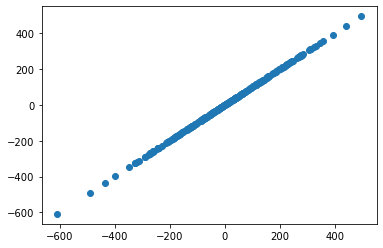

In [53]:
plt.scatter(y_Test,y_pred);

In [58]:
ridge.score(X_Test,y_Test)

0.9999969664453151

In [54]:
ridge_10=Ridge(alpha=10)

In [56]:
ridge_10.fit(X_Entrenamiento,y_Entrenamiento)

Ridge(alpha=10)

In [59]:
y_pred_10=ridge_10.predict(X_Test)

In [61]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(y_Test,y_pred_10)**(1/2)

2.836871702038912

In [64]:
ridge_01=Ridge(alpha=0.1)
ridge_01.fit(X_Entrenamiento,y_Entrenamiento)
y_pred_01=ridge_01.predict(X_Test)
mean_squared_error(y_Test,y_pred_01)**(1/2)

0.028969234393876112

### Lasso

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso=Lasso()
lasso.fit(X_Entrenamiento,y_Entrenamiento)
y_pred_lasso=lasso.predict(X_Test)
mean_squared_error(y_Test,y_pred_lasso)**(1/2)

3.2214847747908926

In [69]:
import numpy as np

In [70]:
np.sum(lasso.coef_!=0)

10

In [73]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_Entrenamiento,y_Entrenamiento)
y_pred_lasso=lasso.predict(X_Test)
mean_squared_error(y_Test,y_pred_lasso)**(1/2)

0.003133235331822319

In [74]:
np.sum(lasso.coef_!=0)

10

### Elastic Net

In [75]:
from sklearn.linear_model import ElasticNet 

In [76]:
elastic=ElasticNet()
elastic.fit(X_Entrenamiento,y_Entrenamiento)
y_pred_elastic=elastic.predict(X_Test)
mean_squared_error(y_Test,y_pred_elastic)**(1/2)

59.74894547274932

In [78]:
elastic=ElasticNet(alpha=10,l1_ratio=0.8)
elastic.fit(X_Entrenamiento,y_Entrenamiento)
y_pred_elastic=elastic.predict(X_Test)
mean_squared_error(y_Test,y_pred_elastic)**(1/2)

118.0403529554629

In [79]:
from sklearn.datasets import fetch_california_housing

In [80]:
fetch_california_housing?

Signature:
fetch_california_housing(
    *,
    data_home=None,
    download_if_missing=True,
    return_X_y=False,
    as_frame=False,
)
Docstring:
Load the California housing dataset (regression).

==============   ==============
Samples total             20640
Dimensionality                8
Features                   real
Target           real 0.15 - 5.
==============   ==============

Read more in the :ref:`User Guide <california_housing_dataset>`.

Parameters
----------
data_home : str, default=None
    Specify another download and cache folder for the datasets. By default
    all scikit-learn data is stored in '~/scikit_learn_data' subfolders.

download_if_missing : bool, default=True
    If False, raise a IOError if the data is not locally available
    instead of trying to download the data from the source site.


return_X_y : bool, default=False.
    If True, returns ``(data.data, data.target)`` instead of a Bunch
    object.

    .. versionadded:: 0.20

as_frame : bool, defa

In [82]:
datos=fetch_california_housing().data

In [83]:
datos

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [84]:
Target=fetch_california_housing().target

In [85]:
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']